In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
sub_df = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

print(train_df.head())
print(test_df.head())
print(sub_df.head())

   id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  
     id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8

In [4]:
print("\nMissing values in Train Data:")
print(train_df.isnull().sum())
print("\nMissing values in Test Data:")
print(test_df.isnull().sum())


Missing values in Train Data:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

Missing values in Test Data:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


In [5]:

# Summary statistics
print("\nTrain Data Description:")
print(train_df.describe())


Train Data Description:
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.

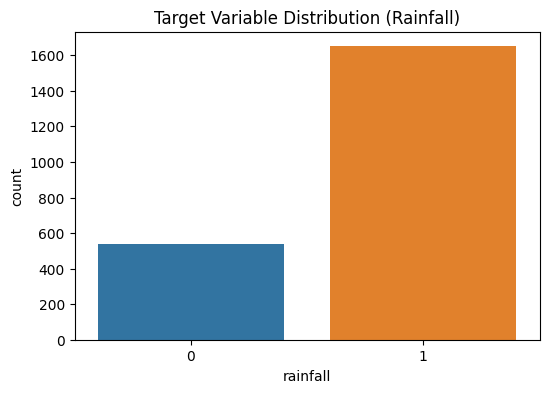

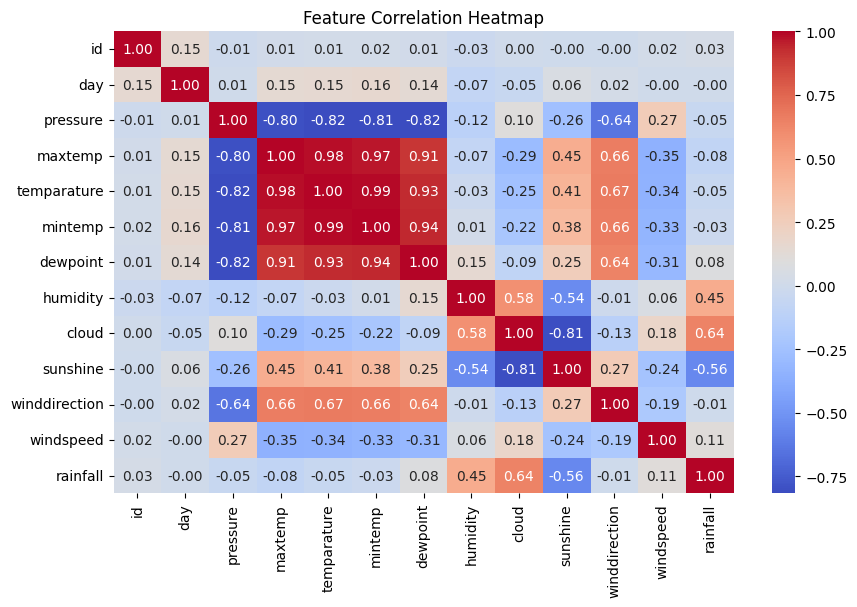

In [6]:

# Check target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['rainfall'])
plt.title("Target Variable Distribution (Rainfall)")
plt.show()

# Check correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Get correlation matrix as numerical values
correlation_matrix = train_df.corr()
print(correlation_matrix)
correlation_with_target = train_df.corr()["rainfall"].sort_values(ascending=False)
print(correlation_with_target)


                     id       day  pressure   maxtemp  temparature   mintemp  \
id             1.000000  0.153065 -0.008235  0.012590     0.014307  0.018708   
day            0.153065  1.000000  0.005337  0.146294     0.153590  0.161475   
pressure      -0.008235  0.005337  1.000000 -0.800499    -0.816531 -0.814453   
maxtemp        0.012590  0.146294 -0.800499  1.000000     0.982932  0.965529   
temparature    0.014307  0.153590 -0.816531  0.982932     1.000000  0.987150   
mintemp        0.018708  0.161475 -0.814453  0.965529     0.987150  1.000000   
dewpoint       0.006797  0.137929 -0.817008  0.906703     0.933617  0.941342   
humidity      -0.029042 -0.074048 -0.119949 -0.072615    -0.025016  0.009891   
cloud          0.002226 -0.048175  0.098600 -0.289047    -0.249355 -0.219399   
sunshine      -0.003022  0.060936 -0.257163  0.452387     0.414019  0.379497   
winddirection -0.004223  0.024800 -0.643293  0.662235     0.668963  0.663828   
windspeed      0.020167 -0.000199  0.266

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load data
train_df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
sub_df = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

# Data Preprocessing
train_df.rename(columns={'temparature': 'temperature'}, inplace=True)
test_df.rename(columns={'temparature': 'temperature'}, inplace=True)

# Fill missing value in winddirection (only 1 missing)
test_df['winddirection'].fillna(test_df['winddirection'].median(), inplace=True)

# Drop ID column
train_df.drop(columns=['id'], inplace=True)
test_ids = test_df['id']
test_df.drop(columns=['id'], inplace=True)


# Feature Engineering: Create new features
train_df['temp_diff'] = train_df['maxtemp'] - train_df['mintemp']
test_df['temp_diff'] = test_df['maxtemp'] - test_df['mintemp']

# Prevent division by zero (adding a small value)
epsilon = 1e-6
train_df['humidity_dew_ratio'] = train_df['humidity'] / (train_df['dewpoint'] + epsilon)
test_df['humidity_dew_ratio'] = test_df['humidity'] / (test_df['dewpoint'] + epsilon)

train_df['pressure_wind_ratio'] = train_df['pressure'] / (train_df['windspeed'] + epsilon)
test_df['pressure_wind_ratio'] = test_df['pressure'] / (test_df['windspeed'] + epsilon)

# Replace any remaining inf values with NaN and then fill them
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)


# Define features and target
X = train_df.drop(columns=['rainfall'])
y = train_df['rainfall']

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize/Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=200, random_state=5, class_weight="balanced")
model.fit(X_train_scaled, y_train)

# Validate Model
y_val_pred = model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_val_pred)
print(f"Validation ROC-AUC Score: {roc_score:.4f}")

# Predictions on test data
test_predictions = model.predict_proba(X_test_scaled)[:, 1]

# Prepare submission
submission = pd.DataFrame({'id': test_ids, 'rainfall': test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file saved!")


<ipython-input-8-310347a625e2>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['winddirection'].fillna(test_df['winddirection'].median(), inplace=True)


Validation ROC-AUC Score: 0.8708
Submission file saved!


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

# Load data
train_df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
sub_df = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

# Data Preprocessing
train_df.rename(columns={'temparature': 'temperature'}, inplace=True)
test_df.rename(columns={'temparature': 'temperature'}, inplace=True)

# Fill missing value in winddirection (only 1 missing)
test_df['winddirection'].fillna(test_df['winddirection'].median(), inplace=True)


# Feature Engineering: Create new features
train_df['temp_diff'] = train_df['maxtemp'] - train_df['mintemp']
test_df['temp_diff'] = test_df['maxtemp'] - test_df['mintemp']

# Prevent division by zero (adding a small value)
epsilon = 1e-6
train_df['humidity_dew_ratio'] = train_df['humidity'] / (train_df['dewpoint'] + epsilon)
test_df['humidity_dew_ratio'] = test_df['humidity'] / (test_df['dewpoint'] + epsilon)

train_df['pressure_wind_ratio'] = train_df['pressure'] / (train_df['windspeed'] + epsilon)
test_df['pressure_wind_ratio'] = test_df['pressure'] / (test_df['windspeed'] + epsilon)

train_df['humidity_pressure_ratio'] = train_df['humidity'] / (train_df['pressure'] + epsilon)
test_df['humidity_pressure_ratio'] = test_df['humidity'] / (test_df['pressure'] + epsilon)

train_df['wind_humidity_ratio'] = train_df['windspeed'] / (train_df['humidity'] + epsilon)
test_df['wind_humidity_ratio'] = test_df['windspeed'] / (test_df['humidity'] + epsilon)

# Replace any remaining inf values with NaN and then fill them
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Define features and target
X = train_df.drop(columns=['rainfall'])
y = train_df['rainfall']

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize/Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=5)


cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid, n_iter=50, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42
)


random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_

# Evaluate best model
y_val_pred = best_model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_val_pred)
print(f"Best model Validation ROC-AUC Score: {roc_score:.4f}")

# Predictions on test data using the best model
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]  # Fixed model usage

# Prepare submission
submission = pd.DataFrame({'id': test_ids, 'rainfall': test_predictions})
submission.to_csv("submission02.csv", index=False)
print("Submission file saved!")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


<ipython-input-9-fbb6286ea60b>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['winddirection'].fillna(test_df['winddirection'].median(), inplace=True)


Best model Validation ROC-AUC Score: 0.8746
Submission file saved!


In [10]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': -1,
    'num_leaves': 31,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}

# Train LightGBM
lgb_model = lgb.LGBMClassifier(**lgb_params)

# Train with CV
auc_scores = []
for train_idx, val_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='auc')
    
    preds = lgb_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    auc_scores.append(auc)

print(f"LightGBM Mean AUC: {sum(auc_scores)/len(auc_scores):.5f}")

# Predictions on test data using the best model
test_predictions = lgb_model.predict_proba(X_test_scaled)[:, 1]  # Fixed model usage

# Prepare submission
submission = pd.DataFrame({'id': test_ids, 'rainfall': test_predictions})
submission.to_csv("submission_lgb_model.csv", index=False)
print("Submission file saved!")

[LightGBM] [Info] Number of positive: 1320, number of negative: 432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753425 -> initscore=1.116961
[LightGBM] [Info] Start training from score 1.116961
[LightGBM] [Info] Number of positive: 1320, number of negative: 432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753425 -> initscore=1.116961
[LightGBM] [Info] Start training from score 1.116961
[LightGBM] [Warning] No 

In [11]:
import xgboost as xgb

# XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'use_label_encoder': False
}

# Train XGBoost
xgb_model = xgb.XGBClassifier(**xgb_params)

# Train with CV
auc_scores = []
for train_idx, val_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='auc', verbose=100, early_stopping_rounds=50)
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100, early_stopping_rounds=50)

    
    preds = xgb_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    auc_scores.append(auc)

print(f"XGBoost Mean AUC: {sum(auc_scores)/len(auc_scores):.5f}")

# Predictions on test data using the best model
test_predictions = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Fixed model usage

# Prepare submission
submission = pd.DataFrame({'id': test_ids, 'rainfall': test_predictions})
submission.to_csv("submission_XGB.csv", index=False)
print("Submission file saved!")


[0]	validation_0-auc:0.80641
[71]	validation_0-auc:0.91625


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81372
[54]	validation_0-auc:0.84722
[0]	validation_0-auc:0.80509
[77]	validation_0-auc:0.86277
[0]	validation_0-auc:0.87514


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-auc:0.89809
[131]	validation_0-auc:0.89731
[0]	validation_0-auc:0.85311
[100]	validation_0-auc:0.89503


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[166]	validation_0-auc:0.89071
XGBoost Mean AUC: 0.88970
Submission file saved!


In [12]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_params = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_params, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [13]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

lgb_params = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 50, 70, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc')

random_search = RandomizedSearchCV(lgb_model, param_distributions=lgb_params, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 1650, number of negative: 540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3069
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753425 -> initscore=1.116961
[LightGBM] [Info] Start training from score 1.116961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
